### カリキュラム - 【AIコース】Keras Tuning1 SGD, epoch, learning curve

In [1]:
# モデルの学習
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras.callbacks
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.
/Users/yasu/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Loading data
seed = 7
np.random.seed(seed)

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_iris = pd.read_csv(url, header = None)
df_iris.columns = [
    "sepal length in cm",
    "sepal width in cm",
    "petal length in cm",
    "petal width in cm",
    "class"
]

In [3]:
# Preprocessing - Split into input X, label y
X = df_iris.values[:,0:4].astype(float)
y = df_iris.values[:,4]
# Convert string to integer
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
# Convert integer to one-hot
y_dummy = np_utils.to_categorical(y_encoded)
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy)
# Select and define model
model = Sequential()
model.add(Dense(8, input_dim = 4, activation = "sigmoid"))
model.add(Dense(3, activation = "softmax"))

RESULT_PATH = "./result"
if not os.path.exists(RESULT_PATH):
    os.mkdir(RESULT_PATH)

cp_cb = keras.callbacks.ModelCheckpoint(
    filepath = os.path.join(RESULT_PATH, "weights.{epoch:02d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5"),
    monitor = "val_loss", verbose = 1, save_best_only = True, mode = "auto")

# Define optimization method
sgd = SGD(lr = 0.1)
# Compile model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = sgd,
    metrics = ["accuracy"],
)

# Learning - Save information such as loss or accuracy of training and validation
history = model.fit(X_train, y_train, 
                    epochs = 200, 
                    batch_size = 10,
                    validation_split = 0.3,
                    callbacks = [cp_cb]
                   )
# Save model to JSON
model_json = model.to_json()
model_path = os.path.join(RESULT_PATH, "model.json")
with open(model_path, "w") as json_file:
    json_file.write(model_json)

Train on 78 samples, validate on 34 samples
Epoch 1/200
78/78 [==============================] - 0s 3ms/step - loss: 1.1013 - acc: 0.4615 - val_loss: 1.1418 - val_acc: 0.3824
Epoch 2/200
78/78 [==============================] - 0s 396us/step - loss: 1.0817 - acc: 0.4872 - val_loss: 1.0632 - val_acc: 0.3235
Epoch 3/200
78/78 [==============================] - 0s 354us/step - loss: 1.0503 - acc: 0.6154 - val_loss: 1.0556 - val_acc: 0.4118
Epoch 4/200
78/78 [==============================] - 0s 150us/step - loss: 1.0181 - acc: 0.7564 - val_loss: 1.0727 - val_acc: 0.5000
Epoch 5/200
78/78 [==============================] - 0s 379us/step - loss: 0.9955 - acc: 0.7179 - val_loss: 1.0116 - val_acc: 0.5882
Epoch 6/200
78/78 [==============================] - 0s 324us/step - loss: 0.9519 - acc: 0.7179 - val_loss: 0.9735 - val_acc: 0.5882
Epoch 7/200
78/78 [==============================] - 0s 333us/step - loss: 0.9176 - acc: 0.7179 - val_loss: 0.9467 - val_acc: 0.5882
Epoch 8/200
78/78 [========

In [4]:
# Verify under fitting or over fitting by learning curve
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


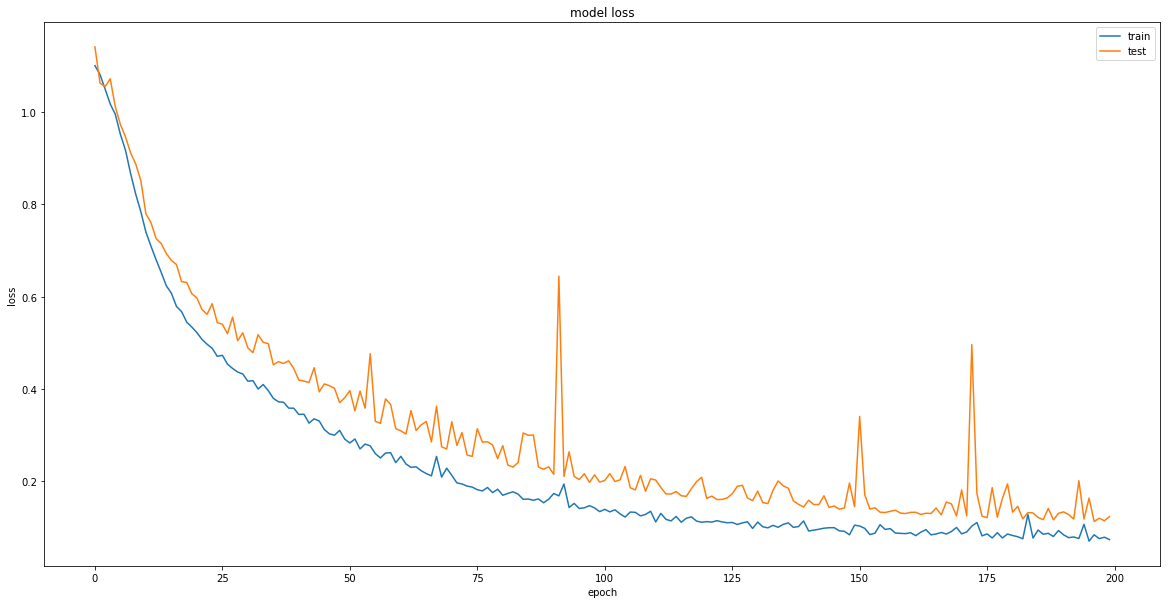

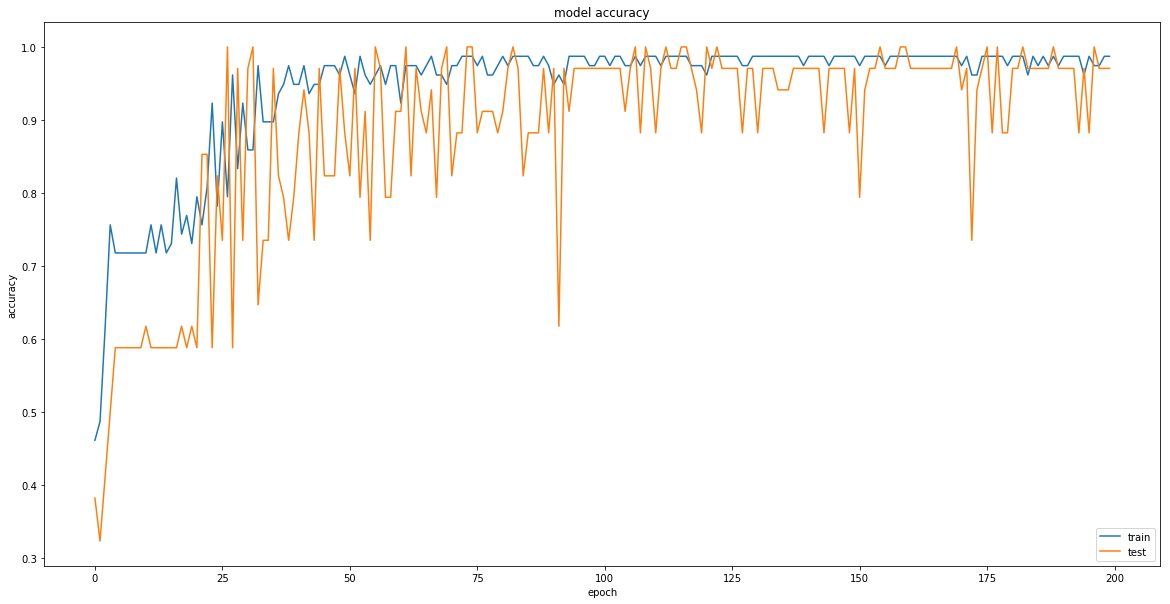

In [5]:
# Summerize history for loss
plt.figure(figsize = (20, 10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper right")
# Summerize history for accuracy
plt.figure(figsize = (20, 10))
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "lower right")

In [11]:
# [LOADED MODEL VERSION]
# Load model
json_file = open(model_path, "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Load weights
weights_path = os.path.join(RESULT_PATH, "weights.176-0.09-0.99-0.12-1.00.hdf5")
loaded_model.load_weights(weights_path)

In [12]:
# [[LOADED MODEL VERSION]
# Compile with loaded model
loaded_model.compile(
    loss = "categorical_crossentropy",
    optimizer = sgd,
    metrics = ["accuracy"],
)
history = loaded_model.fit(X_train, y_train, 
                    epochs = 200, 
                    batch_size = 10,
                    validation_split = 0.3
                   )

Train on 78 samples, validate on 34 samples
Epoch 1/200
78/78 [==============================] - 0s 2ms/step - loss: 0.0867 - acc: 0.9872 - val_loss: 0.1216 - val_acc: 1.0000
Epoch 2/200
78/78 [==============================] - 0s 215us/step - loss: 0.0820 - acc: 0.9872 - val_loss: 0.1216 - val_acc: 0.9706
Epoch 3/200
78/78 [==============================] - 0s 212us/step - loss: 0.0818 - acc: 0.9872 - val_loss: 0.1579 - val_acc: 0.9412
Epoch 4/200
78/78 [==============================] - 0s 173us/step - loss: 0.0777 - acc: 0.9872 - val_loss: 0.1427 - val_acc: 0.9706
Epoch 5/200
78/78 [==============================] - 0s 176us/step - loss: 0.0899 - acc: 0.9872 - val_loss: 0.1188 - val_acc: 1.0000
Epoch 6/200
78/78 [==============================] - 0s 186us/step - loss: 0.0771 - acc: 0.9872 - val_loss: 0.1560 - val_

In [13]:
# [LOADED MODEL VERSION]
# Verify under fitting or over fitting by learning curve
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


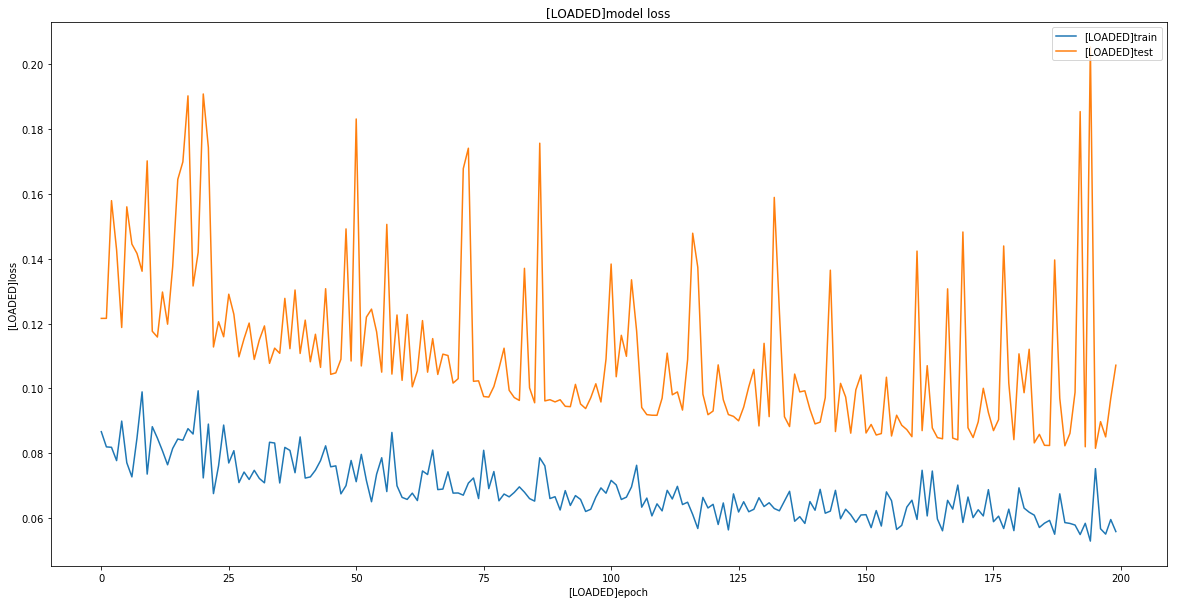

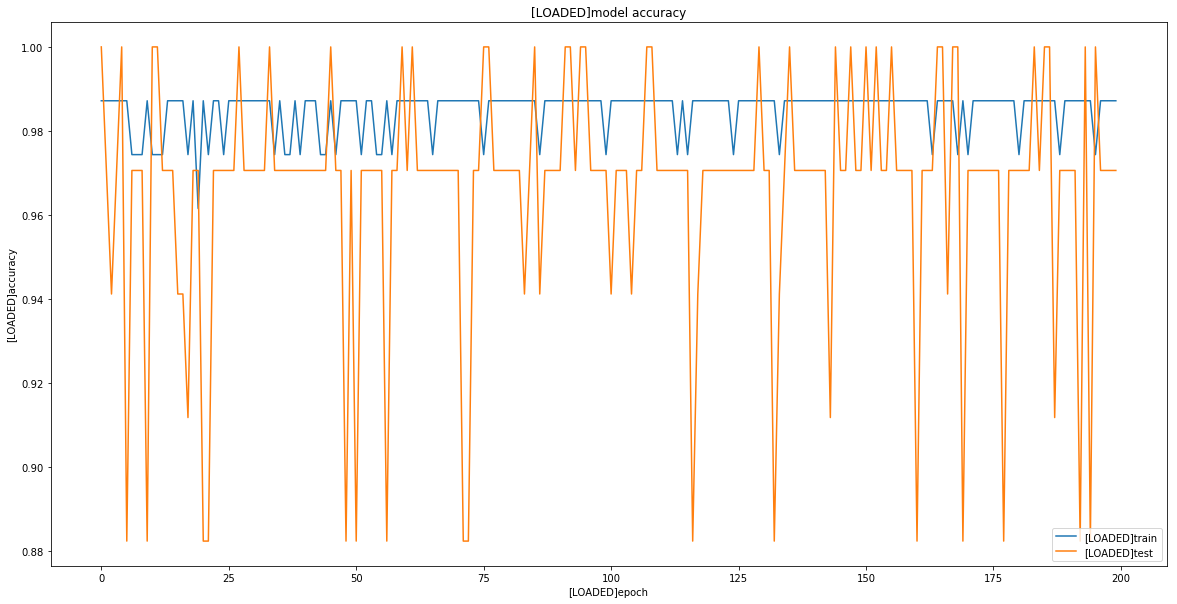

In [14]:
# [LOADED MODEL VERSION]
# Summerize history for loss
plt.figure(figsize = (20, 10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("[LOADED]model loss")
plt.ylabel("[LOADED]loss")
plt.xlabel("[LOADED]epoch")
plt.legend(["[LOADED]train", "[LOADED]test"], loc = "upper right")
# Summerize history for accuracy
plt.figure(figsize = (20, 10))
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("[LOADED]model accuracy")
plt.ylabel("[LOADED]accuracy")
plt.xlabel("[LOADED]epoch")
plt.legend(["[LOADED]train", "[LOADED]test"], loc = "lower right")